In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_gprup1.csv")
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,2a03:2880:f273:c8:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TLSv1.3,253,"Server Hello, Application Data"
1,3,0.058330,2a03:2880:f273:c8:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TLSv1.3,253,"Server Hello, Application Data"
2,7,0.161005,2a03:2880:f273:c8:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TLSv1.3,257,Application Data
3,10,0.161660,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,2a03:2880:f273:c8:face:b00c:0:167,TLSv1.2,937,Ignored Unknown Record
4,12,0.162315,2a03:2880:f273:c8:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TLSv1.3,257,Application Data


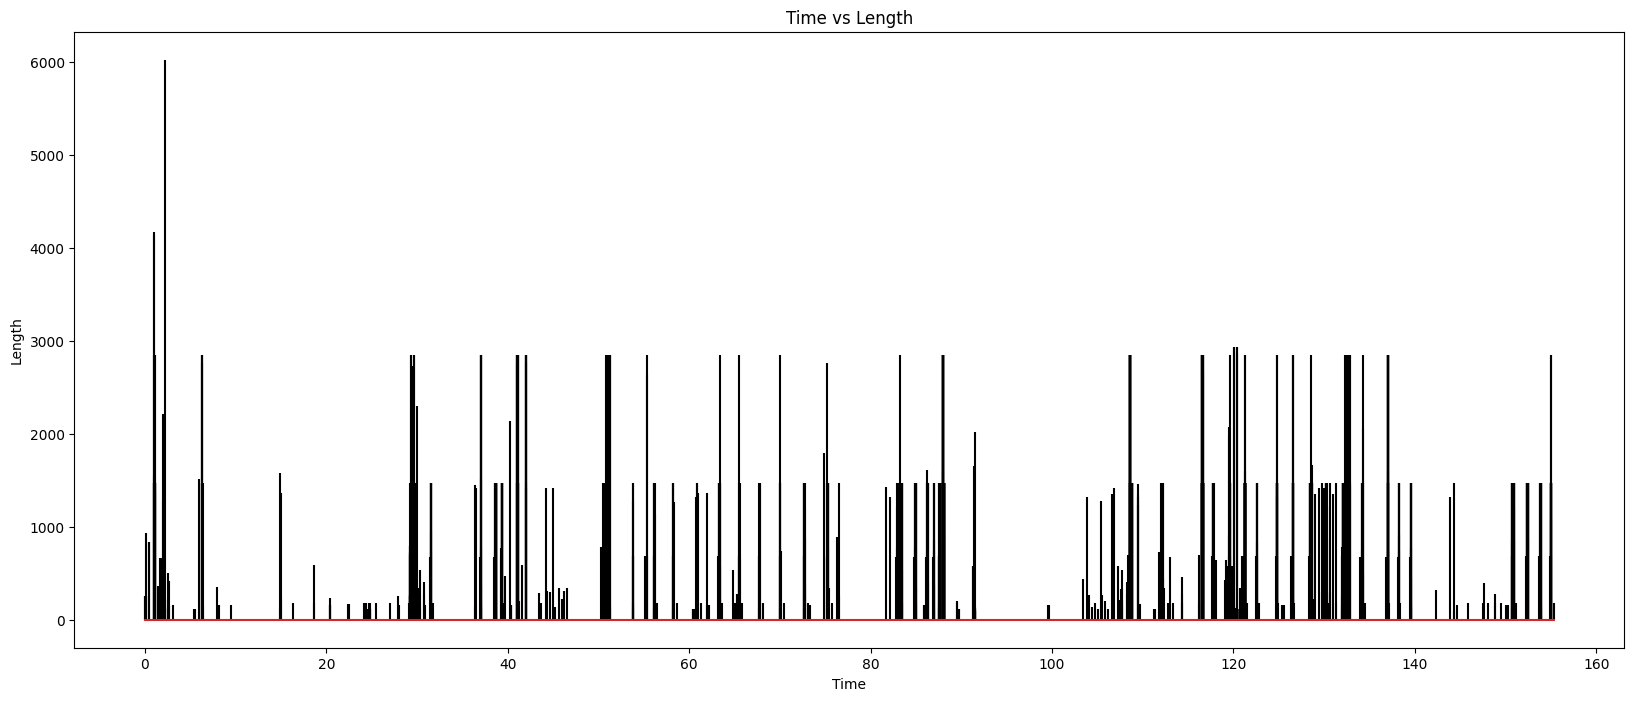

In [3]:
time = df['Time']
len = df['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')

plt.show()

In [15]:
video_data = pd.read_csv("video_group.csv")
video_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,2a03:2880:f273:c8:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TLSv1.2,165,Application Data
1,4,2.560208,2a03:2880:f273:c8:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TCP,1468,443 > 56848 [ACK] Seq=78 Ack=1 Win=547 Len=1...
2,6,2.560746,2a03:2880:f273:c8:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TLSv1.2,742,"Application Data, Application Data"
3,8,2.969924,2a03:2880:f273:c8:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TLSv1.2,229,Application Data
4,10,3.215864,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,2a03:2880:f273:c8:face:b00c:0:167,TLSv1.2,188,Application Data


In [ ]:
time = video_data['Time']
len = video_data['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [4]:
long_text_data = pd.read_csv("long_text.csv")
long_text_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,2,0.919980,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,2a03:2880:f258:1c3:face:b00c:0:167,TLSv1.2,156,Application Data
1,11,3.079813,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,2a03:2880:f258:1c3:face:b00c:0:167,TLSv1.2,956,Application Data
2,16,3.378218,2a03:2880:f258:1c3:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TLSv1.2,197,Application Data
3,18,3.685451,2a03:2880:f258:1c3:face:b00c:0:167,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,TLSv1.2,180,Application Data
4,20,3.692586,2a00:a041:3c5d:4d00:f4a4:3acb:df53:1bea,2a03:2880:f258:1c3:face:b00c:0:167,TLSv1.2,179,Application Data


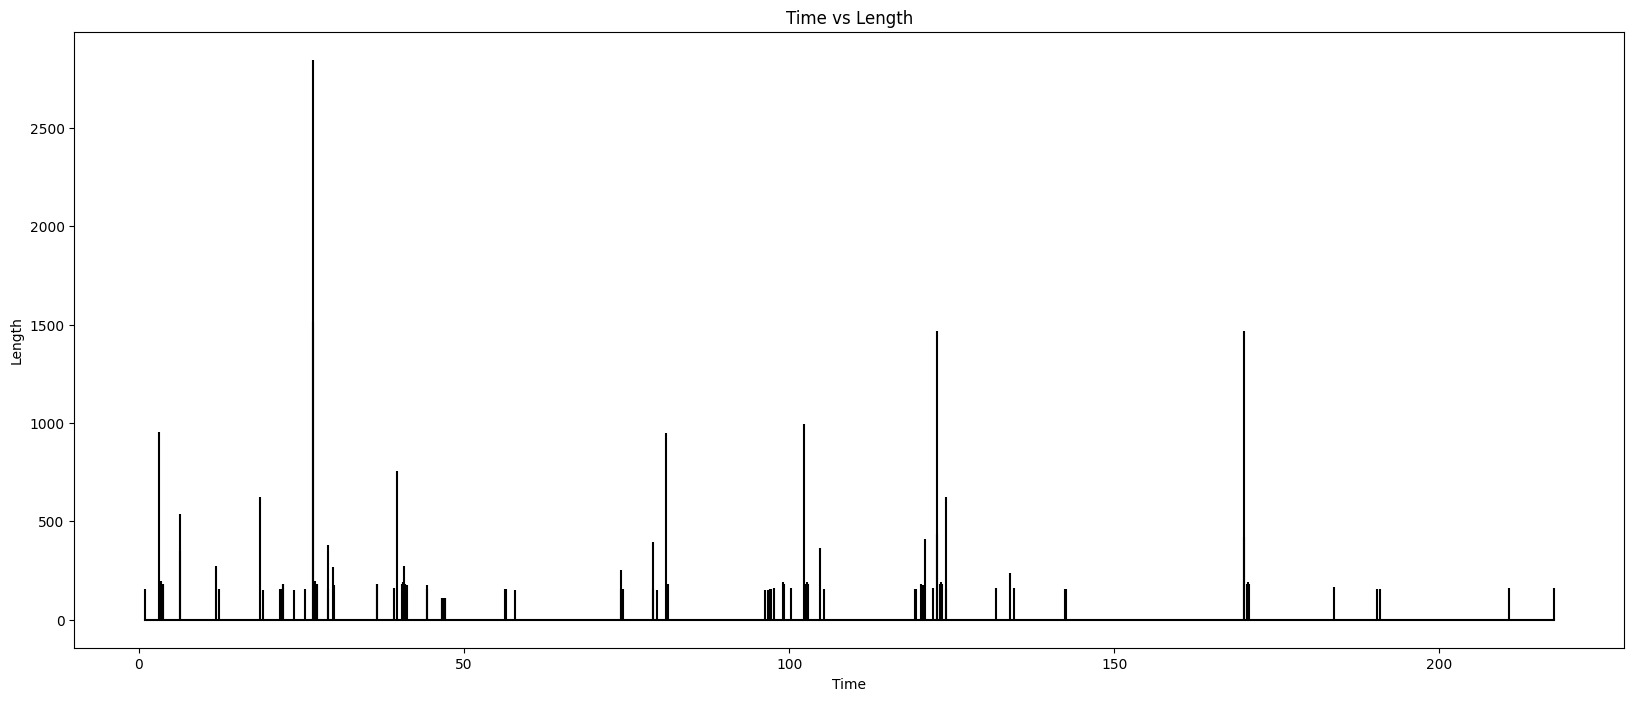

In [13]:
time = long_text_data['Time']
len = long_text_data['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()